In [153]:
from torch.utils.data import DataLoader
from torch import nn

import Monet
from data import MultiDSprites
import utils
import matplotlib.pyplot as plt
import torch


In [186]:
slot = 4
load_parameters = "checkpoint/m-5799-8.pth.tar"

model = Monet.monet(slot, train=False)
utils.load_checkpoint(model, load_parameters)

loading checkpoint!


(monet(
   (atten_net): attention_net(
     (down_block1): unet_downsample_block(
       (conv): double_conv(
         (layers): Sequential(
           (0): Conv2d(4, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
           (1): InstanceNorm2d(64, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
           (2): ReLU()
           (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
           (4): InstanceNorm2d(64, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
           (5): ReLU()
         )
       )
       (output_layer): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
     )
     (down_block2): unet_downsample_block(
       (conv): double_conv(
         (layers): Sequential(
           (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
           (1): InstanceNorm2d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)


In [192]:
testset = MultiDSprites(train=True)
testloader = DataLoader(testset, batch_size=5,
                         shuffle=True, num_workers=8)

In [193]:
sample = next(iter(testloader))
reconstruction_image, logmasks, history_logsk, recon_images = model(sample)

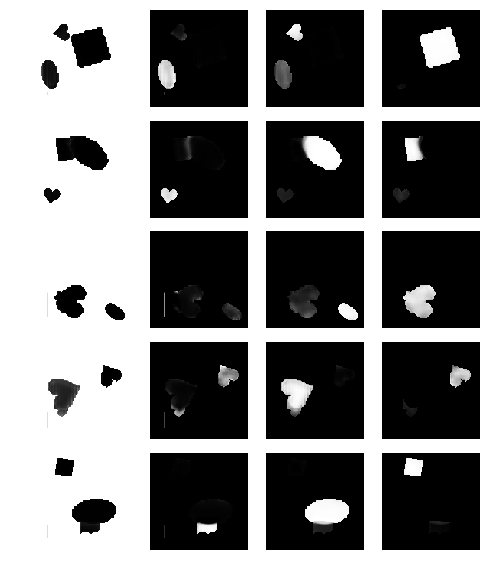

In [194]:
r = reconstruction_image.shape[0]
c = logmasks.shape[1]
plt.figure(figsize=(c * 2, r * 2))
#plt.tight_layout()

for i in range(r):
    for j in range(c):
        plt.subplot(r, c, i*c+j+1)
        plt.imshow(torch.exp(logmasks[i, j, :, :]), plt.cm.gray)
        plt.axis('off')
        plt.subplots_adjust(hspace=0.1)
        


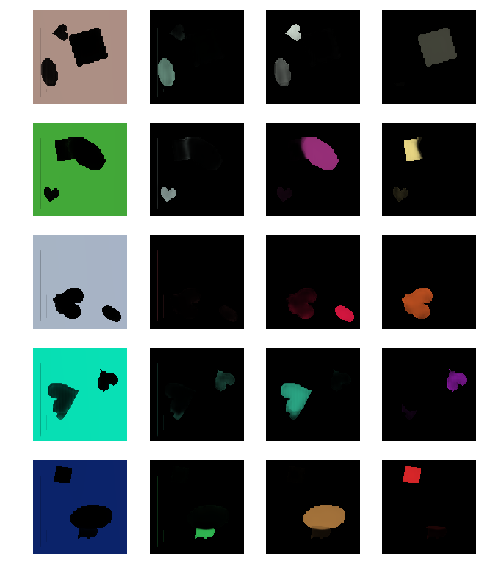

In [195]:
r = reconstruction_image.shape[0]
c = logmasks.shape[1]
plt.figure(figsize=(c * 2, r * 2))
for i in range(r):
    for j in range(c):
        plt.subplot(r, slot, i*slot+j+1)
        plt.axis('off')
        plt.imshow((recon_images[i, :, :, :, j] * torch.exp(logmasks[i, j, :, :])).permute(1, 2, 0))
        

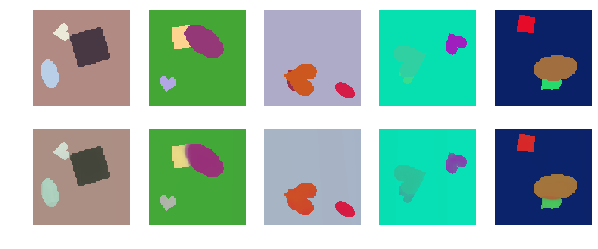

In [196]:
plt.figure(figsize=(r * 2, 2 * 2))
for i in range(r * 2):
    if i < r:
        plt.subplot(2, r, i+1)
        plt.axis('off')
        plt.imshow(sample[i, :, :, :].permute(1, 2, 0))
    else:
        plt.subplot(2, r, i+1)
        plt.axis('off')
        plt.imshow(reconstruction_image[i-r, :, :, :].permute(1, 2, 0))